# Prepare map Haute-Garonne townships

## Imports

In [2]:
%run "../config/notebook.ipynb"
%run "../config/files.ipynb"
%run "../utils/stop_execution.ipynb"

import pandas as pd
import geopandas as gpd
from shapely import wkt

## Read from cache

In [3]:
if 'FROM_CACHE' in locals() or 'FROM_CACHE' in globals():
    if FROM_CACHE:
        __df_hautegaronne_townships = pd.read_csv(PREPARED_MAP_HAUTEGARONNE_TOWNSHIPS_FILE_PATH, index_col=0)
        
        __df_hautegaronne_townships['geometry'] = __df_hautegaronne_townships['geometry'].apply(wkt.loads)
        gdf_hautegaronne_townships = gpd.GeoDataFrame(__df_hautegaronne_townships, geometry = 'geometry')
                
        # remove the temporary dataframe
        del __df_hautegaronne_townships
        
        print("(from cache) gdf_hautegaronne_townships: {} townships".format(len(gdf_hautegaronne_townships.index)))        
        raise StopExecution

## Create the Haute-Garonne townships geodataframe

### Read the basemap

In [4]:
gdf_france_townships = gpd.read_file(FRANCE_TOWNSHIP_BASEMAP_FILE_PATH)

### Add the department information

In [5]:
gdf_france_townships['department'] = gdf_france_townships['insee'].apply(lambda x: str(x)[:-3])

### Filter on Haute-Garonne department

In [6]:
gdf_hautegaronne_townships = gdf_france_townships[gdf_france_townships['department'] == '31']

## Persist in a cache

In [7]:
gdf_hautegaronne_townships.to_csv(PREPARED_MAP_HAUTEGARONNE_TOWNSHIPS_FILE_PATH)
print("gdf_hautegaronne_townships: {} townships".format(len(gdf_hautegaronne_townships.index)))

gdf_hautegaronne_townships: 586 townships


In [14]:
gdf_hautegaronne_townships[gdf_hautegaronne_townships['nom'] == 'Saint-Clar-de-Rivière']

,insee,nom,wikipedia,surf_ha,geometry,department
15438,31475,Saint-Clar-de-Rivière,fr:Saint-Clar-de-Rivière,1003,"POLYGON ((1.19105 43.48335, 1.19499 43.48421, ...",31


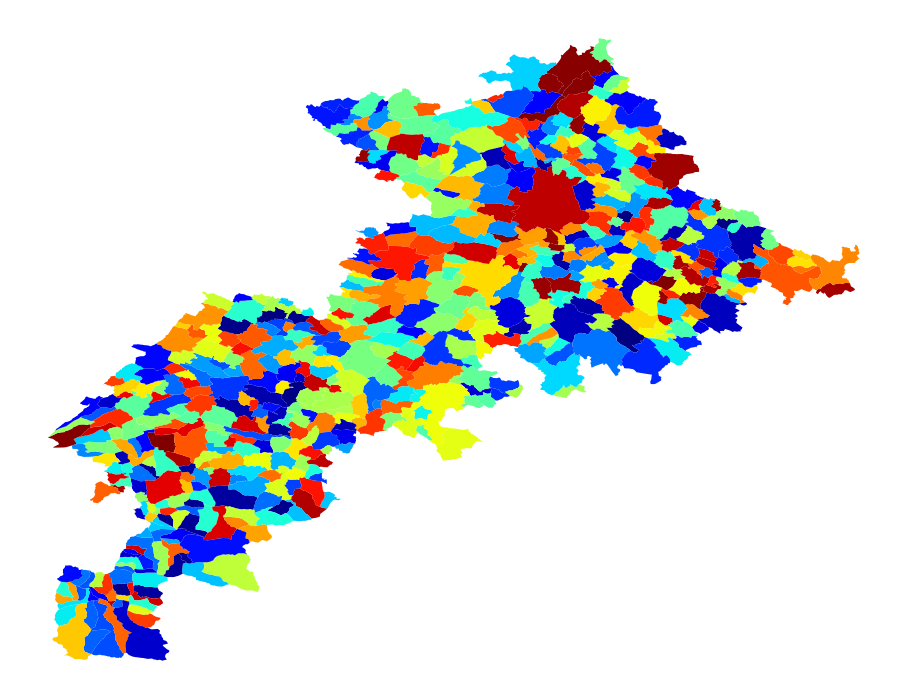

In [10]:
def display():    
    ax = gdf_hautegaronne_townships.plot(figsize=(16,16),column='nom', cmap='jet')
    # Turns off-grid on the left Axis.
    ax.grid(False)
    ax.axis('off')

# display()